In [1]:
from google.colab import files
uploaded = files.upload()

Saving medical_costs.csv to medical_costs.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('medical_costs.csv')
df

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49
...,...,...,...,...,...,...,...
9995,24,female,26.9,2,yes,southeast,16551.53
9996,49,female,33.4,3,no,northeast,6376.05
9997,52,female,38.1,5,yes,northwest,18760.27
9998,24,male,33.4,4,no,northwest,5471.91


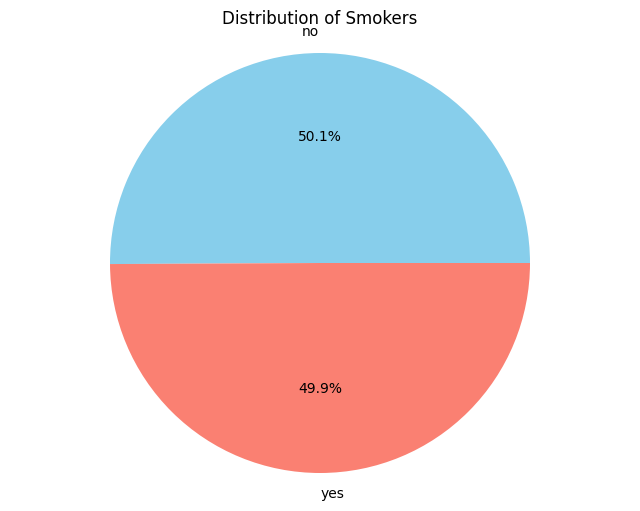

In [9]:
# Count occurrences of each category (Yes/No)
smoker_counts = df['Smoker'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Distribution of Smokers")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [20]:
df.groupby(['Region', 'Smoker']).size().unstack().fillna(0)

Smoker,no,yes
Region,,
northeast,1256,1258
northwest,1255,1231
southeast,1219,1260
southwest,1278,1243


In [21]:
df_smoker_proportions.div(df_smoker_proportions.sum(axis=1), axis=0)

Smoker,no,yes
Region,,
northeast,0.499602,0.500398
northwest,0.504827,0.495173
southeast,0.491731,0.508269
southwest,0.506942,0.493058


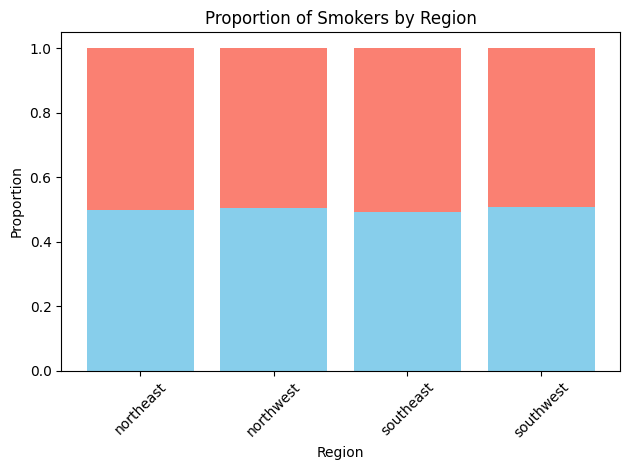

In [17]:
df_smoker_proportions = df.groupby(['Region', 'Smoker']).size().unstack().fillna(0) # gets counts of each count
df_smoker_proportions = df_smoker_proportions.div(df_smoker_proportions.sum(axis=1), axis=0) # divide by sum of all counts

# Data for plot
x = df_smoker_proportions.index  # Gets the index: Regions
y1 = df_smoker_proportions['no']  # Proportion of non-smokers
y2 = df_smoker_proportions['yes']  # Proportion of smokers

# Create stacked bar plot
plt.bar(x, y1, color='skyblue')  # Plot non-smokers
plt.bar(x, y2, bottom=y1, color='salmon')  # Plot smokers on top of non-smokers

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.title('Proportion of Smokers by Region')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

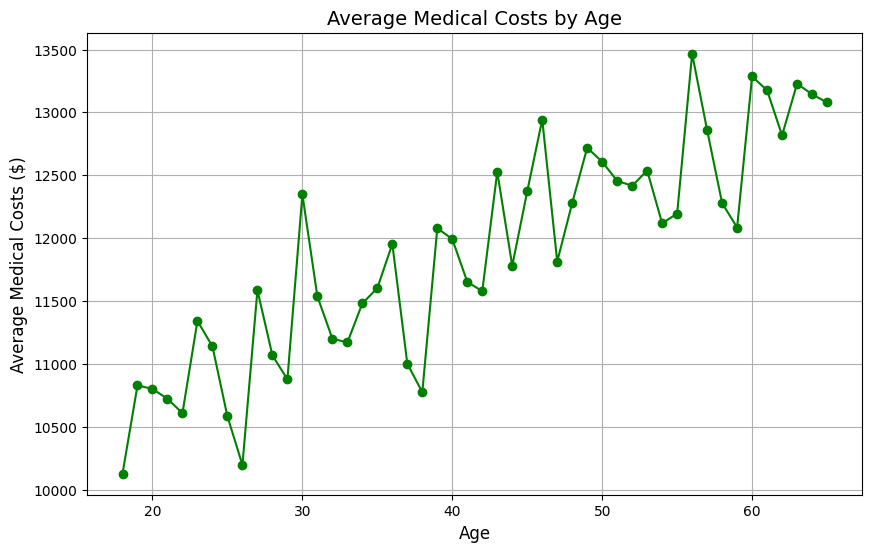

In [31]:
df_avg_costs = df.groupby('Age')['Medical Cost'].mean().reset_index()
# after groupby, the age is set as the index, but reset_index resets the index so age is its own column in df
# group by age and calculate the mean of medical cost

plt.figure(figsize=(10,6))
plt.plot(df_avg_costs['Age'], df_avg_costs['Medical Cost'], color='green', marker='o')


plt.title('Average Medical Costs by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Medical Costs ($)', fontsize=12)

# Display the plot
plt.grid(True)
plt.show()